In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)

In [2]:
data = pd.read_csv('/content/creditcard.csv')

In [3]:
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [5]:
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [4]:
print(data.describe())

               Time           V1           V2           V3           V4  \
count   7973.000000  7973.000000  7973.000000  7973.000000  7973.000000   
mean    4257.151261    -0.299740     0.295226     0.899355     0.215736   
std     3198.964299     1.498341     1.283914     1.090297     1.447057   
min        0.000000   -23.066842   -25.640527   -12.389545    -4.657545   
25%     1531.000000    -1.046362    -0.237359     0.372435    -0.687521   
50%     3635.000000    -0.416341     0.335446     0.948695     0.223379   
75%     6662.000000     1.122758     0.950582     1.597949     1.131542   
max    10981.000000     1.685314     8.261750     4.101716     7.380245   

                V5           V6           V7           V8           V9  ...  \
count  7973.000000  7973.000000  7973.000000  7973.000000  7973.000000  ...   
mean     -0.025285     0.157286    -0.026445    -0.070525     0.655244  ...   
std       1.167218     1.325015     1.063709     1.332568     1.156618  ...   
min     

In [6]:
print(data['Class'].value_counts())

Class
0.0    7947
1.0      25
Name: count, dtype: int64


In [10]:
data = data.dropna(subset=['Class'])
X = data.drop('Class', axis=1)
y = data['Class']
X = X.fillna(X.median())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
print(pd.Series(y_resampled).value_counts())

Class
0.0    7947
1.0    7947
Name: count, dtype: int64


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [13]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

In [15]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_pred))
print(f"Precision: {precision_score(y_test, lr_pred):.4f}")
print(f"Recall: {recall_score(y_test, lr_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, lr_pred):.4f}")
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))
print(f"Precision: {precision_score(y_test, rf_pred):.4f}")
print(f"Recall: {recall_score(y_test, rf_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, rf_pred):.4f}")

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1594
         1.0       1.00      1.00      1.00      1585

    accuracy                           1.00      3179
   macro avg       1.00      1.00      1.00      3179
weighted avg       1.00      1.00      1.00      3179

Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1594
         1.0       1.00      1.00      1.00      1585

    accuracy                           1.00      3179
   macro avg       1.00      1.00      1.00      3179
weighted avg       1.00      1.00      1.00      3179

Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


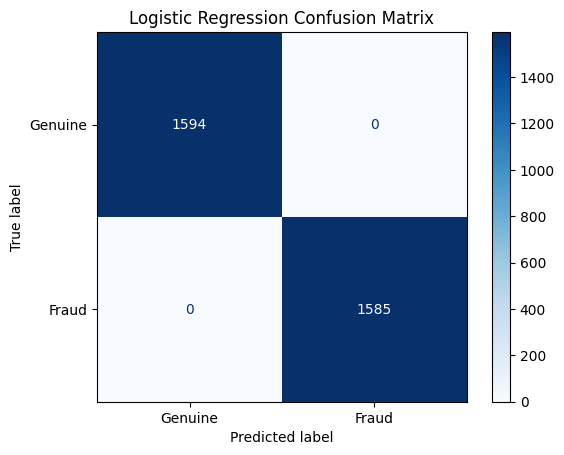

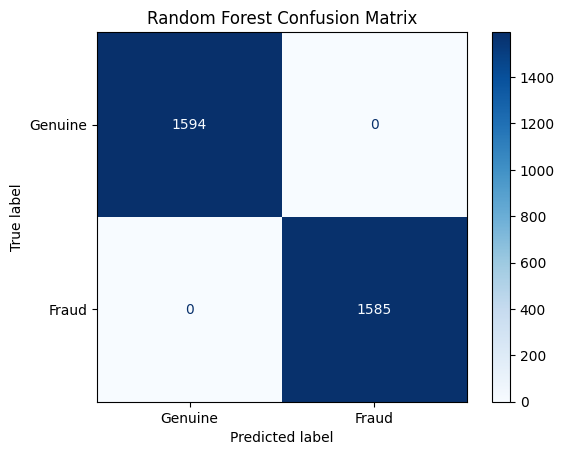

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, lr_pred, display_labels=['Genuine', 'Fraud'], cmap=plt.cm.Blues)
plt.title('Logistic Regression Confusion Matrix')
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test, rf_pred, display_labels=['Genuine', 'Fraud'], cmap=plt.cm.Blues)
plt.title('Random Forest Confusion Matrix')
plt.show()